In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
os.chdir(r"C:\Users\82109\project\2021 빅데이터 경진대회")

In [73]:
comp_1_one = pd.read_csv("comp1_concat.csv")

In [74]:
comp_1_one

,Unnamed: 0,TIME,전류평균,역률평균,온도,전압고조파평균
0,0,2020-10-22 00:00:22,70.500000,0.948331,28.125,4.817708
1,1,2020-10-22 00:01:22,31.822916,0.895390,28.125,4.817708
2,2,2020-10-22 00:02:22,70.927086,0.948258,28.125,4.785156
3,3,2020-10-22 00:03:22,72.843750,0.948171,27.500,4.817708
4,4,2020-10-22 00:04:22,47.104168,0.937192,28.750,4.817708
...,...,...,...,...,...,...
48890,5755,2020-11-26 23:55:35,69.156250,0.948614,20.625,2.864583
48891,5756,2020-11-26 23:56:35,37.562500,0.918352,20.000,2.897136
48892,5757,2020-11-26 23:57:35,41.541668,0.927980,20.625,2.897136
48893,5758,2020-11-26 23:58:35,43.927082,0.932131,20.000,2.864583


In [75]:
comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

In [76]:
comp_1_one.drop('Unnamed: 0', axis = 1, inplace = True)

<AxesSubplot:xlabel='TIMESTAMP'>

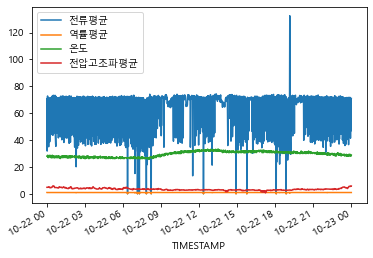

In [77]:
comp_1_one['2020-10-22'].plot()

In [78]:
comp_1_one

,전류평균,역률평균,온도,전압고조파평균
TIMESTAMP,,,,
2020-10-22 00:00:22,70.500000,0.948331,28.125,4.817708
2020-10-22 00:01:22,31.822916,0.895390,28.125,4.817708
2020-10-22 00:02:22,70.927086,0.948258,28.125,4.785156
2020-10-22 00:03:22,72.843750,0.948171,27.500,4.817708
2020-10-22 00:04:22,47.104168,0.937192,28.750,4.817708
...,...,...,...,...
2020-11-26 23:55:35,69.156250,0.948614,20.625,2.864583
2020-11-26 23:56:35,37.562500,0.918352,20.000,2.897136
2020-11-26 23:57:35,41.541668,0.927980,20.625,2.897136


In [79]:
TRAIN_SPLIT = 43135

In [80]:
comp_1_one = comp_1_one.values
comp_1_one_mean = comp_1_one[:TRAIN_SPLIT].mean(axis=0)
comp_1_one_std = comp_1_one[:TRAIN_SPLIT].std(axis=0)
comp_1_one = (comp_1_one-comp_1_one_mean)/comp_1_one_std
print(comp_1_one)

[[ 0.75050964  0.51353161  0.84430285  1.58102437]
 [-0.63696457  0.37348552  0.84430285  1.58102437]
 [ 0.76583062  0.5133385   0.84430285  1.54885528]
 ...
 [-0.28832097  0.45969662 -1.02307101 -0.31695594]
 [-0.20274832  0.47067736 -1.1786855  -0.34912602]
 [-0.04580268  0.48549911 -1.02307101 -0.31695594]]


<AxesSubplot:>

<Figure size 1440x576 with 0 Axes>

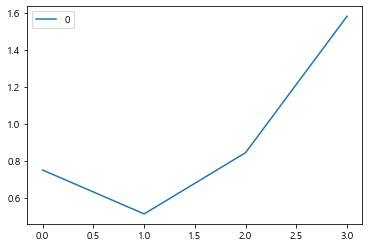

In [81]:
fig = plt.figure(figsize = (20, 8))
pd.DataFrame(comp_1_one[0])[:2000].plot()

<Figure size 432x288 with 0 Axes>

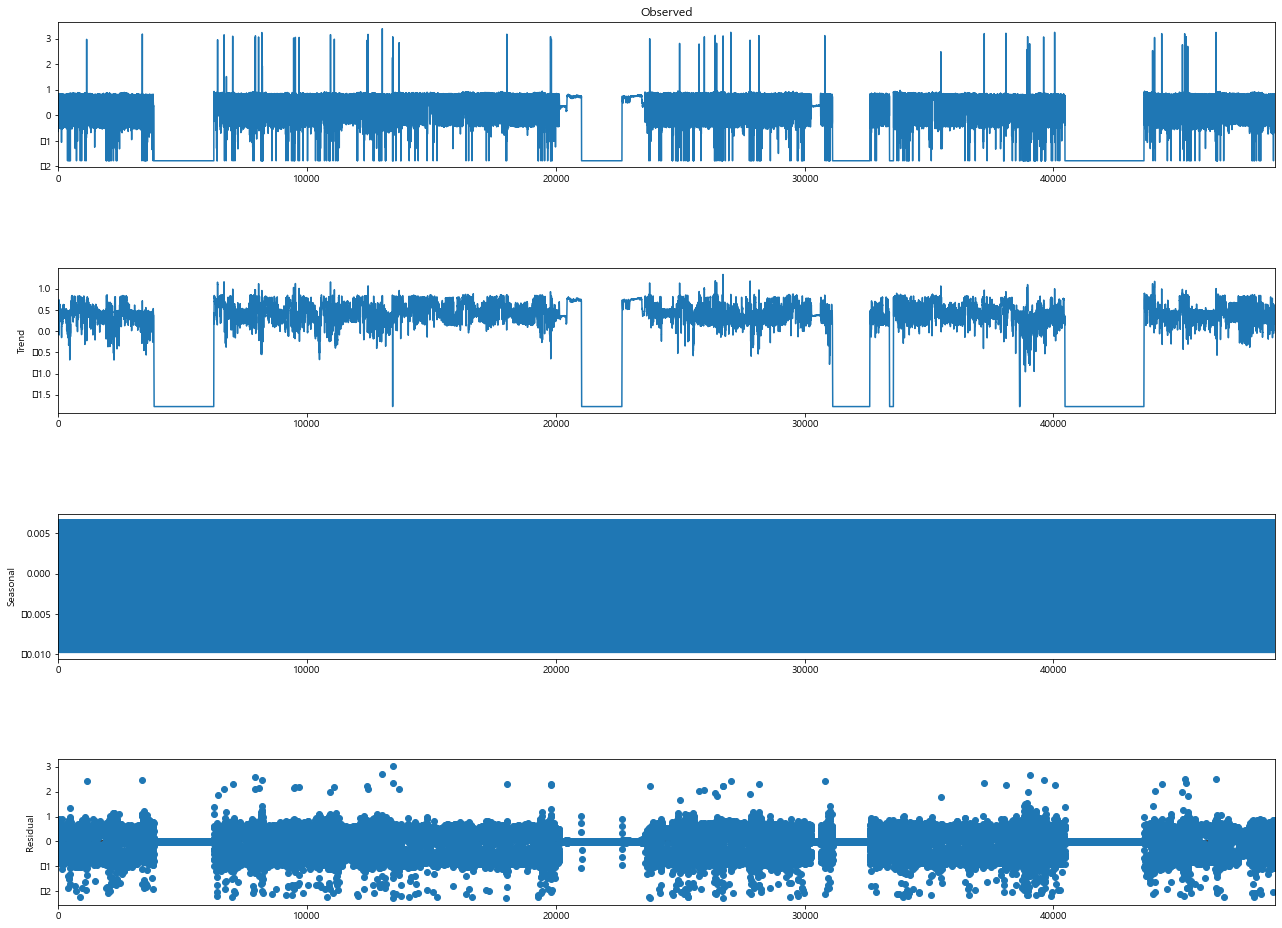

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(comp_1_one[:, 0], model = 'additive', freq = 7)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20, 15)

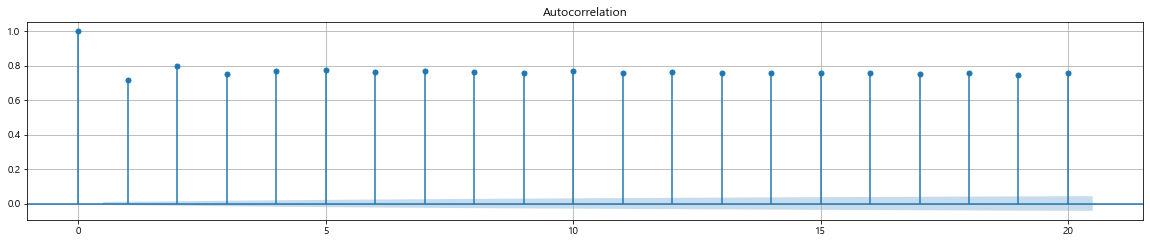

In [83]:
# ACF 그래프 - 정상성 판단

import statsmodels.api as sm

fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(comp_1_one[:, 0], lags = 20, ax = ax1)
plt.grid()
plt.show()

In [84]:
# ADF 검정
from statsmodels.tsa.stattools import adfuller
result = adfuller(comp_1_one[:, 0])
print('ADF Statistics : %f' %result[0])
print('p-value : %f' %result[1])
print('Critical Values : ')
for key, value in result[4].items() : 
    print('\t%s : %.3f' %(key, value))
    
#정상성 만족!!

ADF Statistics : -4.785282
p-value : 0.000058
Critical Values : 
	1% : -3.430
	5% : -2.862
	10% : -2.567


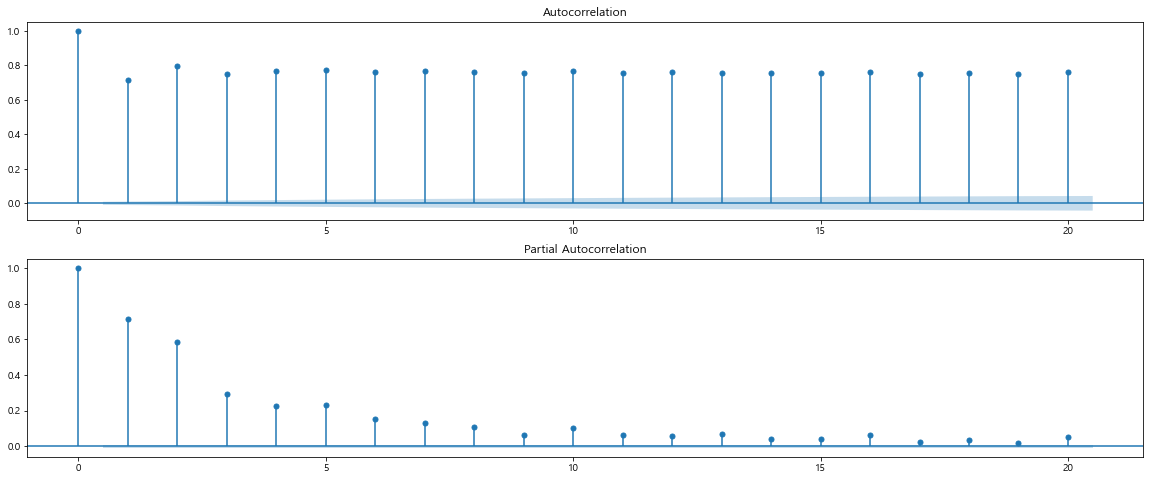

In [85]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(comp_1_one[:, 0], lags = 20, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(comp_1_one[:, 0], lags = 20, ax = ax2)


In [86]:
comp_1_one = pd.DataFrame(comp_1_one)

In [87]:
comp_1_one[0]

0        0.750510
1       -0.636965
2        0.765831
3        0.834588
4       -0.088776
           ...   
48890    0.702305
48891   -0.431067
48892   -0.288321
48893   -0.202748
48894   -0.045803
Name: 0, Length: 48895, dtype: float64

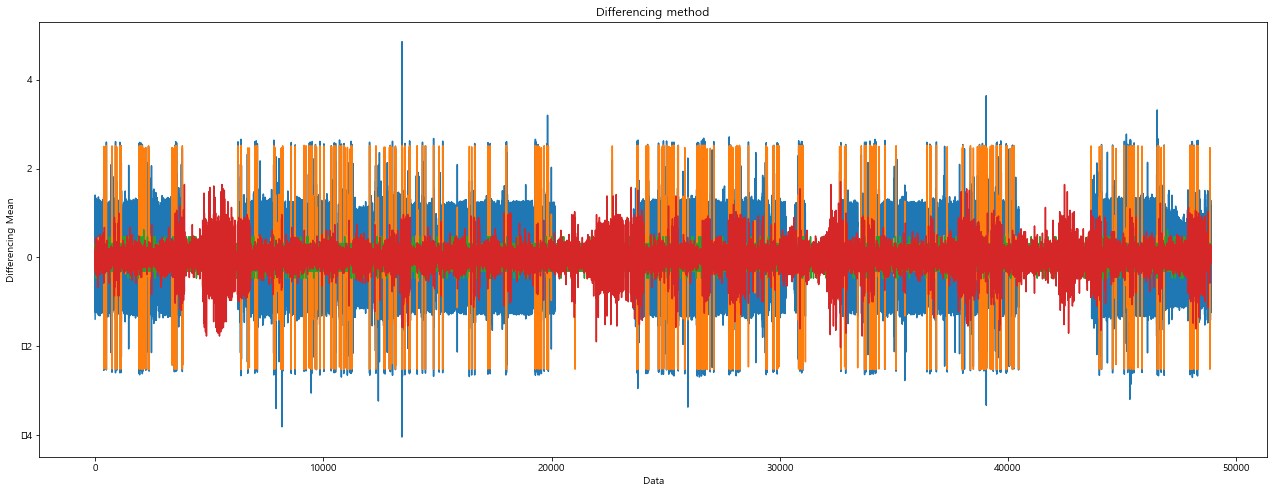

In [88]:
comp_diff = comp_1_one - comp_1_one.shift()
plt.figure(figsize = (22, 8))
plt.plot(comp_diff)
plt.title('Differencing method')
plt.xlabel('Data')
plt.ylabel('Differencing Mean')
plt.show()

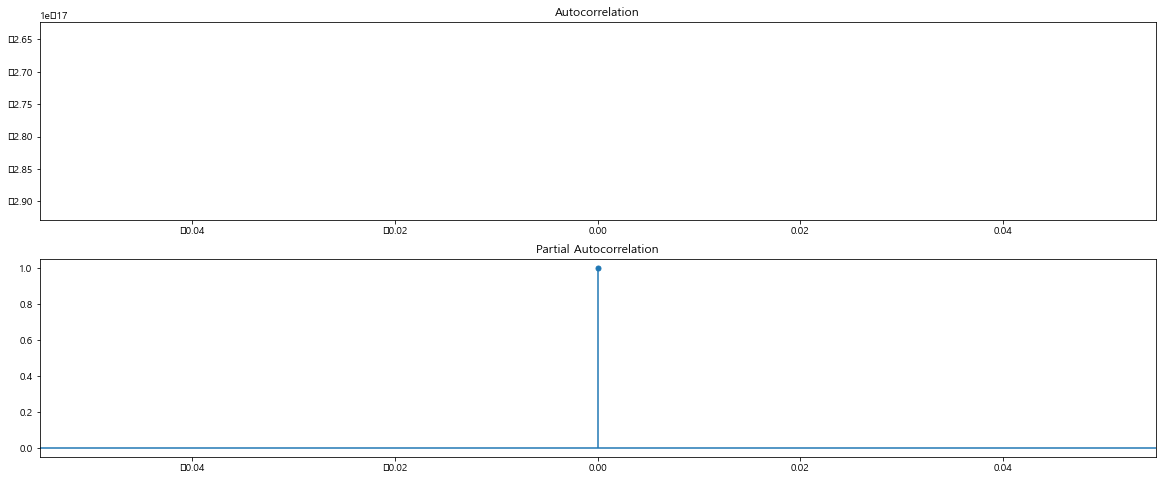

In [90]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(comp_diff[0], lags = 20, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(comp_diff[0], lags = 20, ax = ax2)


<AxesSubplot:>

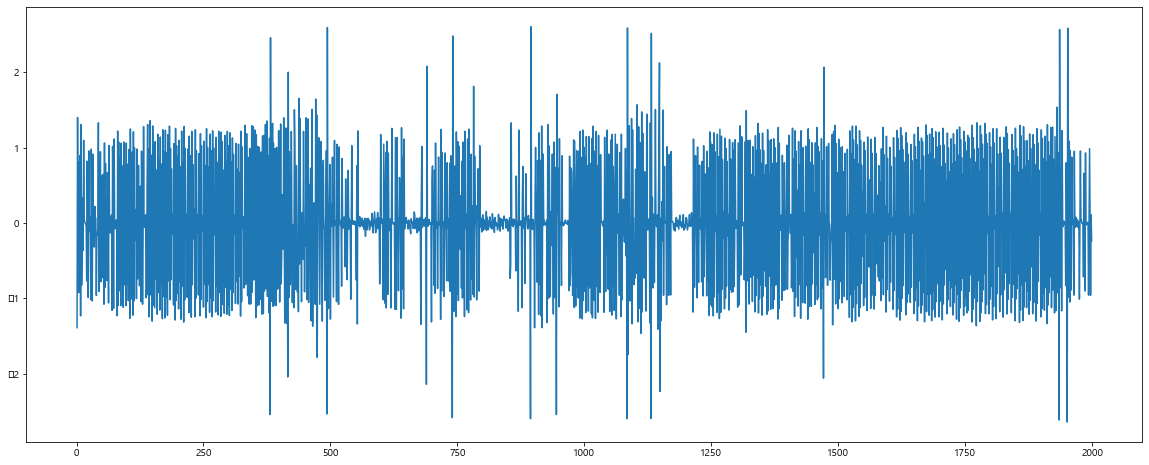

In [91]:
fig = plt.figure(figsize = (20, 8))
comp_diff[0][:2000].plot()

In [92]:
comp_1_one = comp_diff.values

In [113]:
comp_1_one = comp_1_one[1:]

In [95]:
# 한 스텝 예측

In [96]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i:i + target_size])
    return np.array(data), np.array(labels)

In [114]:
past_history = 720
future_target = 72
STEP = 6 

##전압고조파 단변량
x_train_single, y_train_single = multivariate_data(comp_1_one[:, 0].reshape(-1,1), comp_1_one[:, 0], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP, single_step=True)
x_val_single, y_val_single = multivariate_data(comp_1_one[:, 0].reshape(-1,1), comp_1_one[:, 0], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP, single_step=True)

print('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 1)


In [115]:
BUFFER_SIZE = 100
BATCH_SIZE = 500
EPOCHS = 100
EVALUATION_INTERVAL = 10

In [116]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32, input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dropout(0.3)) ##과대적합 방지##
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_error',metrics=['mae'])

for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

(500, 1)


In [117]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/100
10/10 [==============================] - 5s 477ms/step - loss: 0.4516 - mae: 0.4132 - val_loss: 0.6712 - val_mae: 0.6023
Epoch 2/100
10/10 [==============================] - 4s 438ms/step - loss: 0.5983 - mae: 0.5309 - val_loss: 0.6704 - val_mae: 0.5995
Epoch 3/100
10/10 [==============================] - 4s 417ms/step - loss: 0.6232 - mae: 0.5720 - val_loss: 0.6707 - val_mae: 0.5992
Epoch 4/100
10/10 [==============================] - 4s 433ms/step - loss: 0.6061 - mae: 0.5732 - val_loss: 0.6703 - val_mae: 0.5992
Epoch 5/100
10/10 [==============================] - 4s 402ms/step - loss: 0.3270 - mae: 0.2889 - val_loss: 0.6704 - val_mae: 0.5990
Epoch 6/100
10/10 [==============================] - 4s 388ms/step - loss: 0.7777 - mae: 0.6892 - val_loss: 0.6716 - val_mae: 0.6004
Epoch 7/100
10/10 [==============================] - 4s 426ms/step - loss: 0.4714 - mae: 0.4341 - val_loss: 0.6715 - val_mae: 0.6000
Epoch 8/100
10/10 [==============================] - 4s 410ms/step - 

10/10 [==============================] - 4s 410ms/step - loss: 0.6576 - mae: 0.5910 - val_loss: 0.6709 - val_mae: 0.5992
Epoch 63/100
10/10 [==============================] - 4s 416ms/step - loss: 0.6178 - mae: 0.5852 - val_loss: 0.6704 - val_mae: 0.5988
Epoch 64/100
10/10 [==============================] - 4s 402ms/step - loss: 0.2817 - mae: 0.2617 - val_loss: 0.6704 - val_mae: 0.5990
Epoch 65/100
10/10 [==============================] - 4s 407ms/step - loss: 0.7935 - mae: 0.6843 - val_loss: 0.6713 - val_mae: 0.5994
Epoch 66/100
10/10 [==============================] - 4s 417ms/step - loss: 0.4786 - mae: 0.4463 - val_loss: 0.6711 - val_mae: 0.5993
Epoch 67/100
10/10 [==============================] - 4s 412ms/step - loss: 0.6170 - mae: 0.5789 - val_loss: 0.6711 - val_mae: 0.5992
Epoch 68/100
10/10 [==============================] - 4s 403ms/step - loss: 0.3966 - mae: 0.3269 - val_loss: 0.6707 - val_mae: 0.5991
Epoch 69/100
10/10 [==============================] - 4s 404ms/step - loss:

In [118]:
scores=single_step_model.evaluate(x_val_single, y_val_single,batch_size=1000)

5/5 [==============================] - 1s 108ms/step - loss: 0.6710 - mae: 0.5992


In [119]:
scores

[0.6710115671157837, 0.599216878414154]

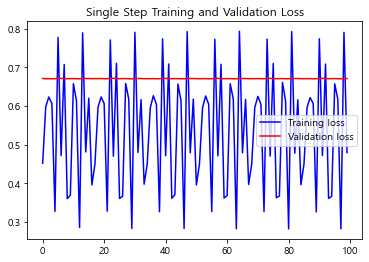

In [120]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(single_step_history,
                   'Single Step Training and Validation Loss')

In [121]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.axis('auto')
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

In [122]:
def create_time_steps(length):
    return list(range(-length, 0))

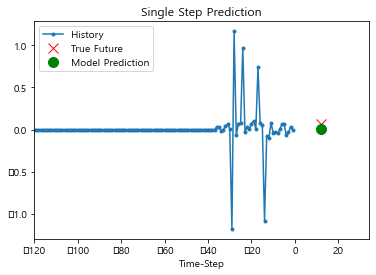

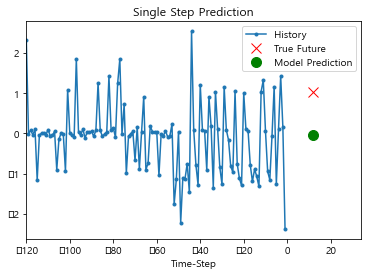

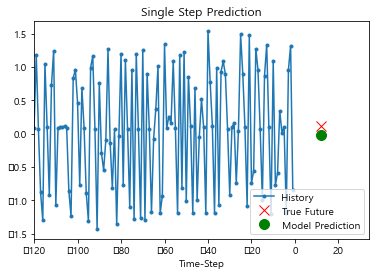

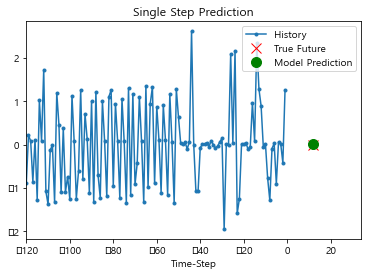

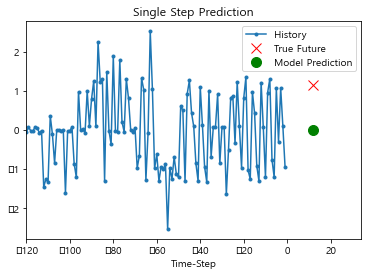

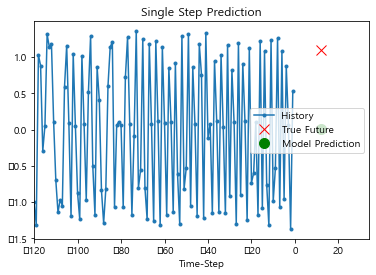

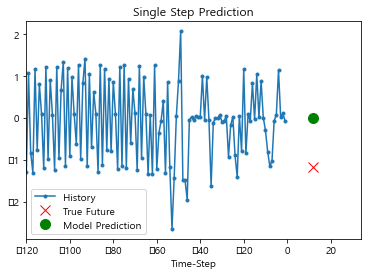

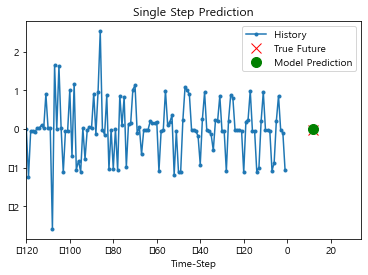

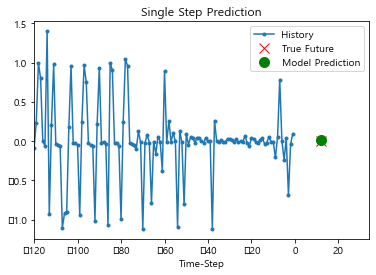

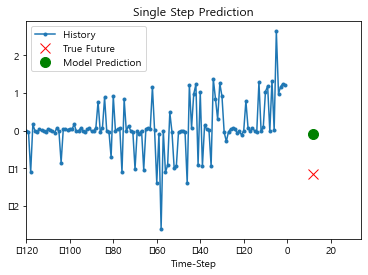

In [123]:
for x, y in val_data_single.take(10):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                      single_step_model.predict(x)[0]], 12,
                     'Single Step Prediction')
    
    plot.show()

In [124]:
for x,y in val_data_single.take(10):
    print(single_step_model.predict(x)[0])

[0.00524741]
[-0.02800683]
[-0.01526724]
[0.02108459]
[-0.013829]
[0.01233773]
[-0.00772236]
[-0.00485651]
[0.01641252]
[-0.0794699]


# Multi Step

In [126]:
TRAIN_SPLIT = 43135

In [127]:
past_history = 720 # 60분 * 24시간 * 2일 // 6분 ( 720분동안 히스토리 )
future_target = 72 # 60분*3 -> 1시간 기준으로 3시간후 // ( 72분 이후 예측 )
STEP = 6 #1분 -> 1시간이니까   // 6분간격

x_train_multi, y_train_multi = multivariate_data(comp_1_one[:, 0].reshape(-1,1), comp_1_one[:, 0], 0, TRAIN_SPLIT, past_history,
                                                   future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(comp_1_one[:, 0].reshape(-1,1), comp_1_one[:, 0], TRAIN_SPLIT, None, past_history,
                                               future_target, STEP)

print('Single window of past history : {}'.format(x_train_multi[0].shape))
print('\n Target 역률평균 to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 1)

 Target 역률평균 to predict : (72,)


In [128]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1000 #전체 데이터를 몇 개의 그룹으로 나눠서 학습할때 나누는 그 크기 (최대한 키우기)
EPOCHS = 100 #학습 반복 횟수 (Validation set에서 epoch 늘릴수록 에러 감소하다가 어느 지점에서 다시 증가 -> 최소)
EVALUATION_INTERVAL = 10

In [129]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [130]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32, return_sequences=True,input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.Dropout(0.3))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dropout(0.3))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mean_squared_error',metrics=['mae'])

In [131]:
for x, y in val_data_multi.take(1):
    print(multi_step_model.predict(x).shape)

(1000, 72)


In [132]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_multi,
                                            validation_steps=50)

Epoch 1/100
10/10 [==============================] - 19s 2s/step - loss: 0.5268 - mae: 0.4685 - val_loss: 0.6725 - val_mae: 0.5995
Epoch 2/100
10/10 [==============================] - 19s 2s/step - loss: 0.5979 - mae: 0.5566 - val_loss: 0.6725 - val_mae: 0.5994
Epoch 3/100
10/10 [==============================] - 18s 2s/step - loss: 0.5611 - mae: 0.4939 - val_loss: 0.6725 - val_mae: 0.5994
Epoch 4/100
10/10 [==============================] - 19s 2s/step - loss: 0.5685 - mae: 0.5104 - val_loss: 0.6725 - val_mae: 0.5994
Epoch 5/100
10/10 [==============================] - 19s 2s/step - loss: 0.3730 - mae: 0.3335 - val_loss: 0.6725 - val_mae: 0.5994
Epoch 6/100
10/10 [==============================] - 20s 2s/step - loss: 0.6378 - mae: 0.5839 - val_loss: 0.6725 - val_mae: 0.5994
Epoch 7/100
10/10 [==============================] - 21s 2s/step - loss: 0.5209 - mae: 0.4616 - val_loss: 0.6725 - val_mae: 0.5994
Epoch 8/100
10/10 [==============================] - 19s 2s/step - loss: 0.5671 - m

KeyboardInterrupt: 

In [ ]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

plot_train_history(multi_step_history,
                   'Multi-Step Training and Validation Loss')

In [ ]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12,6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)
    
    plt.plot(num_in, np.array(history), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future),'b-',label='True Future')
    
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP,np.array(prediction),'r-',label='Predicted Future')
    
    plt.legend(loc='upper left')
    #plt.ylim([-0.81,-0.79])
    plt.xlim([-10,15])
    plt.show()

In [ ]:
def create_time_steps(length):
    return list(range(-length,0))

In [ ]:
for x, y in val_data_multi.take(20):
    multi_step_plot(x[0],y[0],multi_step_model.predict(x)[0])

In [ ]:
scores=multi_step_model.evaluate(x_val_multi, y_val_multi,batch_size=1000)

In [ ]:
scocres

In [125]:
# ARIMA

In [133]:
auto.arima(comp_1_one[:, 0])

NameError: name 'auto' is not defined

In [ ]:
x_train_multi

In [ ]:
x_test_multi

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas as datetime

model = ARIMA(comp_1_one[:, 0], order = ())
model_fit = modell.fit(disp = 0)
#disp : 수렴 정보를 나타냄 - True이면 수렴, <0은 출력없음

start_index = datetime()
end_index = datetime()
forecast = model.fit.predict(start = start_index, end = end_index, typ = 'levvels')

plt.figure(figsize = (22, 8))
plt.plot(comp_1_one.index, comp_1_one[:, 0], label = 'original')
plt.plot(forecast, label = 'predicted')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.legend()
plt.show()